In [53]:
import requests
from bs4 import BeautifulSoup

# get lyrics of the song by scraping
def get_lyrics(url):
    # URL of the page
    # Create a session
    session = requests.Session()
    
    # Set a User-Agent to mimic a browser
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.85 Safari/537.36'
    }
    
    # Send a GET request to the URL with headers
    response = session.get(url, headers=headers)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content using BeautifulSoup
        soup = BeautifulSoup(response.text, 'html.parser')
    
        # Find all div elements that likely contain the lyrics
        lyrics_container = soup.find_all('div', class_='css-1rynq56 r-1grxjyw r-adyw6z r-11rrj2j r-13awgt0 r-ueyrd6 r-fdjqy7')
    
        # Extract the text of each div element containing the lyrics
        lyrics = [div.get_text() for div in lyrics_container]
    
        # Join the lines into a single string
        lyrics_text = '\n'.join(lyrics)
    
        # Print the lyrics
        return(lyrics_text.replace(",", "").split("\n"))
    else:
        return(f"Failed to retrieve page. Status code: {response.status_code}")


In [54]:
import numpy as np

# on-hot encoding
def one_hot_embeddings(input_list):
    vocabulary = []  # Initialize vocabulary inside the function
    embeddings = []
    
    # Create vocabulary
    for sentence in input_list:
        vocabulary += sentence.lower().split(' ')
    vocabulary = list(set(vocabulary))  # Remove duplicates and convert back to list

    # Encoding
    for sentence in input_list:
        row = np.zeros(len(vocabulary), dtype=int)
        for word in sentence.lower().split(' '):
            row[vocabulary.index(word)] = 1
        embeddings.append(row)
    
    return vocabulary, embeddings  # Return both vocabulary and embeddings

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

#plot the heatmap for the encodings
def plot_heatmap(input_list, titleStr):
    vocabulary, embeddings = one_hot_embeddings(input_list)
    # Plot heatmap
    plt.figure(figsize=(12, 6))
    plt.gca().invert_yaxis()  # Optional: Invert y-axis if needed
    plt.gca().xaxis.tick_top()  # Move x-axis to the top
    plt.gca().xaxis.set_label_position('top')  # Set x-axis label position to the top

    # Create a custom colormap for binary values (0 and 1)
    cmap = sns.color_palette(["#91ADDD", "#315693"])  
    
    # Plot the heatmap
    sns.heatmap(embeddings, annot=False, cbar=False, xticklabels=vocabulary, yticklabels="", cmap=cmap)
    plt.title("One-Hot Encoding for "+titleStr)
    plt.show()


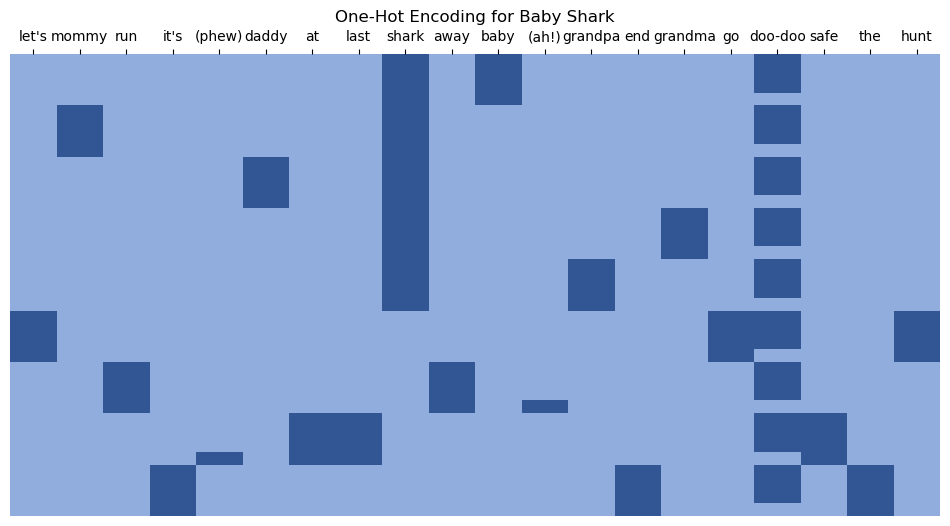

In [83]:
input_list = get_lyrics('https://www.musixmatch.com/lyrics/Pinkfong/Baby-Shark')
plot_heatmap(input_list, 'Baby Shark')

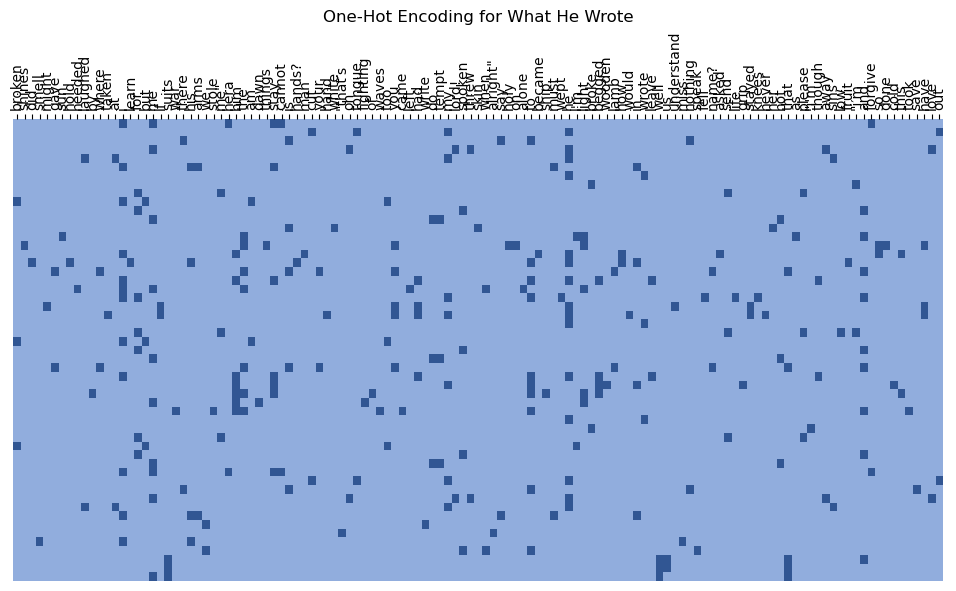

In [84]:
input_list = get_lyrics('https://www.musixmatch.com/lyrics/Laura-Marling/What-He-Wrote')
plot_heatmap(input_list, 'What He Wrote')

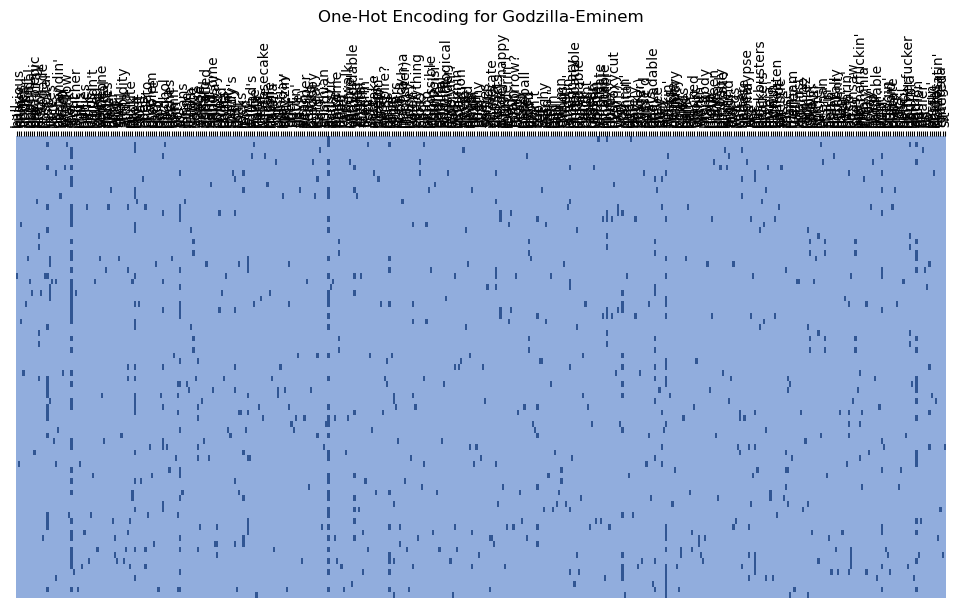

In [85]:
input_list = get_lyrics('https://www.musixmatch.com/lyrics/Eminem-Juice-WRLD/Godzilla-Juice-WRLD')
plot_heatmap(input_list, 'Godzilla-Eminem')